#### Import all the librearies

In [380]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',81)
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss,r2_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from lightgbm import LGBMRegressor

#### Import datasets

In [381]:
train = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Train.xlsx')
test = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Test.xlsx')
submission = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Sample_Submission.xlsx')

In [382]:
# copy of the train , test , submission data

train1 = train.copy()
test1 = test.copy()
submission1 = submission.copy()

In [383]:
# shape of all datasets

print(train.shape)
print(test.shape)
print(submission.shape)


(6237, 9)
(1560, 8)
(1560, 1)


In [384]:
target = train['Price']
train = train.drop(['Price'],axis=1)

In [385]:
df = pd.concat([train,test],axis=0).reset_index(drop=True)

In [386]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography"


In [387]:
df.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,7797,7797,7797,7797,7797,7797,7797,7797
unique,6787,4372,3882,36,368,6771,363,11
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,4,87,60,1751,1328,8,1183,1036


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7797 non-null   object
 1   Author        7797 non-null   object
 2   Edition       7797 non-null   object
 3   Reviews       7797 non-null   object
 4   Ratings       7797 non-null   object
 5   Synopsis      7797 non-null   object
 6   Genre         7797 non-null   object
 7   BookCategory  7797 non-null   object
dtypes: object(8)
memory usage: 487.4+ KB


In [389]:
target.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

<AxesSubplot:>

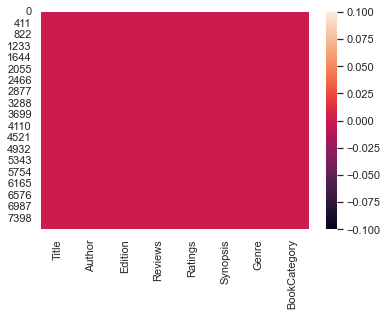

In [390]:
sns.heatmap(df.isnull())

### Title

In [391]:
df['Title'].value_counts().unique()

array([4, 3, 2, 1], dtype=int64)

In [392]:
len(df['Title'].value_counts())

6787

### Data Wragling

In [393]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')

In [394]:
train1.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

### Edition

In [395]:
df['Edition'].value_counts()

Paperback,– 5 Oct 2017                 60
Paperback,– 2016                       58
Paperback,– 2017                       47
Paperback,– 2019                       37
Paperback,– 2013                       35
                                       ..
Paperback,– May 2016                    1
Mass Market Paperback,– 29 Jul 2014     1
Paperback,– 5 Jun 2019                  1
Hardcover,– 18 Jan 2018                 1
Paperback,– 16 Sep 2016                 1
Name: Edition, Length: 3882, dtype: int64

In [396]:

edition_list = []

for element in list(df.Edition):
    edition_list.append(element.split(',')[0])

In [397]:
for i in edition_list:
    if len(i)>11:
        print(i)

Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Plastic Comb
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Tankobon Softcover
Mass Market Paperback
Perfect Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass Market Paperback
Mass

In [398]:
df['Edition_Type'] = edition_list

In [399]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover


In [400]:
df['Edition_Type'].value_counts()

Paperback                6458
Hardcover                1056
Mass Market Paperback     200
Sheet music                32
Flexibound                 19
Cards                       9
Spiral-bound                6
Loose Leaf                  3
Tankobon Softcover          3
Perfect Paperback           1
Board book                  1
Plastic Comb                1
(Kannada)                   1
Product Bundle              1
Library Binding             1
(German)                    1
Leather Bound               1
(French)                    1
(Spanish)                   1
(Chinese)                   1
Name: Edition_Type, dtype: int64

In [401]:

price_list = []
edition_list1 = []
idx = 0
for i in list(train1.Edition):
    str = i.split(',')[0]
    if str in edition_list:
        price_list.append(train1.Price[idx])
        edition_list1.append(str)
        idx+=1
    else:
        idx+=1
       
        
        

In [402]:
len(price_list)

6237

In [403]:
len(edition_list1)

6237

In [404]:
print(set(edition_list1))

{'Plastic Comb', 'Paperback', 'Perfect Paperback', 'Board book', 'Cards', 'Product Bundle', 'Leather Bound', 'Mass Market Paperback', 'Tankobon Softcover', 'Hardcover', 'Spiral-bound', 'Loose Leaf', 'Library Binding', '(French)', 'Flexibound', '(Kannada)', '(Spanish)', '(German)', 'Sheet music'}


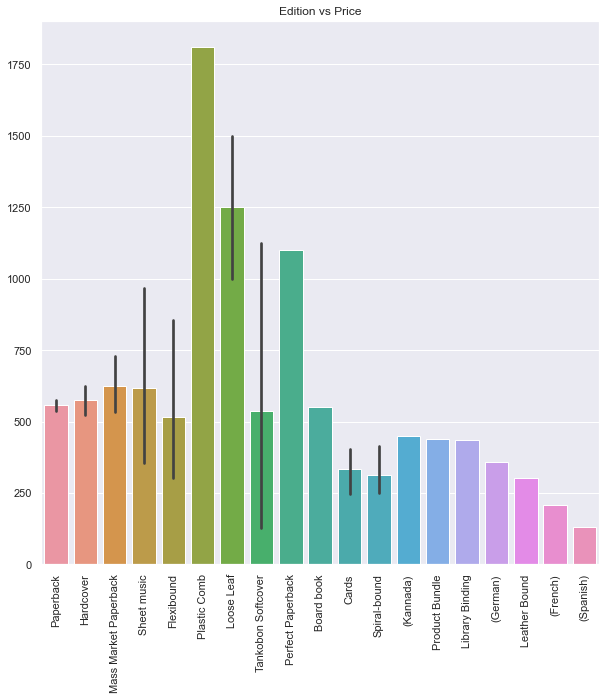

In [405]:
plt.figure(figsize=(10,10))
plt.title("Edition vs Price")
sns.barplot(x=edition_list1,y=price_list , order=price_list.sort(reverse=True))
plt.xticks(rotation=90)
plt.show()

#### Edition Year

In [406]:
import re

editionYear = []

for value in df['Edition']:
    year = re.findall('(\d{4})',value)
    
    if len(year)!=0:
        editionYear.append(year[0])
    else:
        editionYear.append('1997')
    

In [407]:
len(editionYear)

7797

In [408]:
df['Edition_Year'] = editionYear

In [409]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006


In [410]:
df['Edition_Year'].value_counts()

2018    1018
2017     930
2016     835
2015     639
2014     503
2013     463
2019     457
2012     367
2011     356
2010     306
2009     234
2008     204
2005     165
2006     139
2007     131
2003     119
2004     108
2002      83
2000      83
2001      80
1997      76
1999      54
1995      41
1998      39
1996      39
1994      39
1992      38
1991      26
1993      26
1989      24
1986      18
1990      18
1984      18
1987      17
1988      15
1982      14
1985      12
1983      10
1976       9
1980       7
1971       5
1975       4
1960       3
1979       3
1977       3
1964       3
1974       3
1978       2
1981       2
1961       1
1942       1
1973       1
1925       1
1969       1
1900       1
1905       1
1970       1
1972       1
Name: Edition_Year, dtype: int64

In [411]:
train1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [412]:
train_edition_year = []
for i in train1["Edition"]:
    year = re.findall('(\d{4})',i)
    if len(year)!=0:
        train_edition_year.append(year[0])
    else:
        train_edition_year.append('1997')
    

In [413]:
list(set(train_edition_year))

['1969',
 '2019',
 '2008',
 '2005',
 '1978',
 '2011',
 '1995',
 '1977',
 '1971',
 '1970',
 '1900',
 '2006',
 '2007',
 '1996',
 '1988',
 '2003',
 '1993',
 '1976',
 '1960',
 '1905',
 '1975',
 '1989',
 '1979',
 '2017',
 '2010',
 '1925',
 '2004',
 '2002',
 '1974',
 '1987',
 '1964',
 '1998',
 '2001',
 '1981',
 '2015',
 '1982',
 '1986',
 '2012',
 '2009',
 '1990',
 '1980',
 '1961',
 '1973',
 '1991',
 '1983',
 '1994',
 '1997',
 '1992',
 '2016',
 '2018',
 '1999',
 '2000',
 '2014',
 '1984',
 '1985',
 '2013']

In [414]:
len(train_edition_year)

6237

In [415]:
len(list(set(train_edition_year)))

56

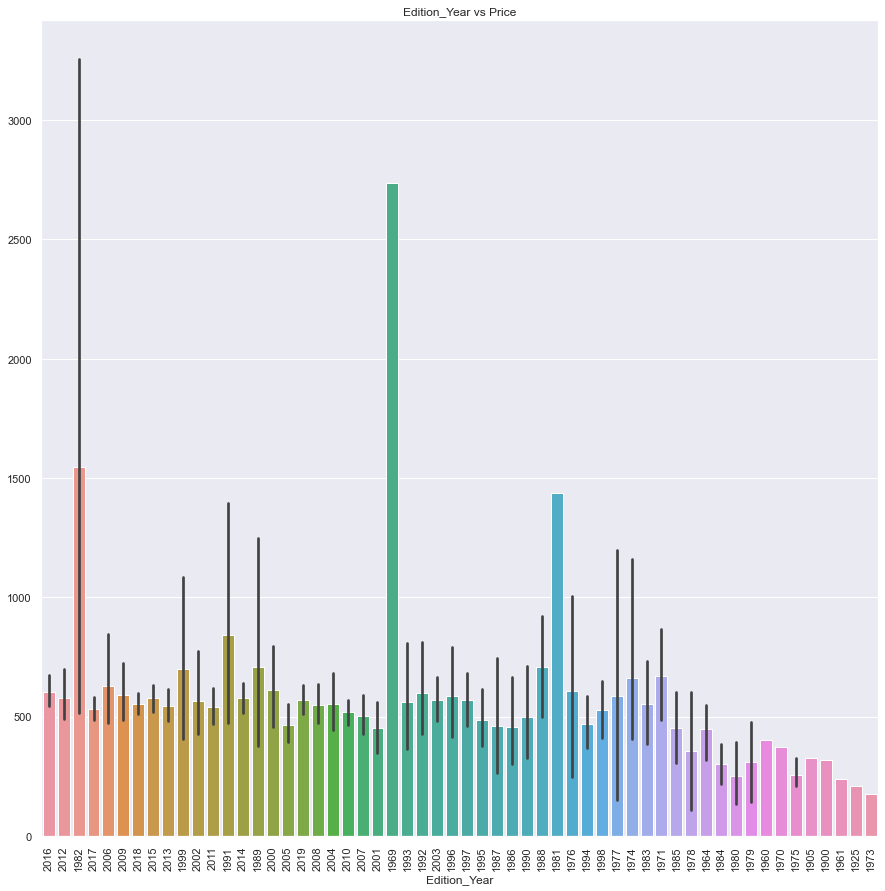

In [416]:
plt.figure(figsize=(15,15))
plt.title("Edition_Year vs Price")
sns.barplot(x=df.loc[:6236, :].Edition_Year,y=price_list, order=price_list.sort(reverse=True))
plt.xticks(rotation=90)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


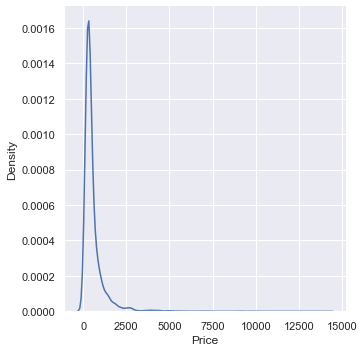

In [417]:
sns.displot(data=train1,x=train1['Price'],kind="kde",height=5,ax=ax)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


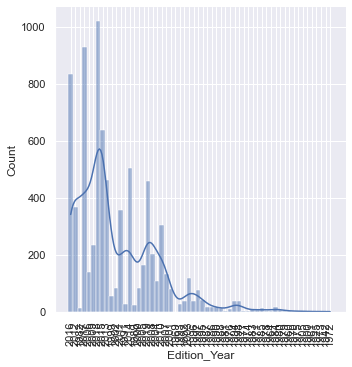

In [418]:
sns.displot(data=df,x=df['Edition_Year'],kde=True,ax=ax)
plt.xticks(rotation=90)
plt.show()

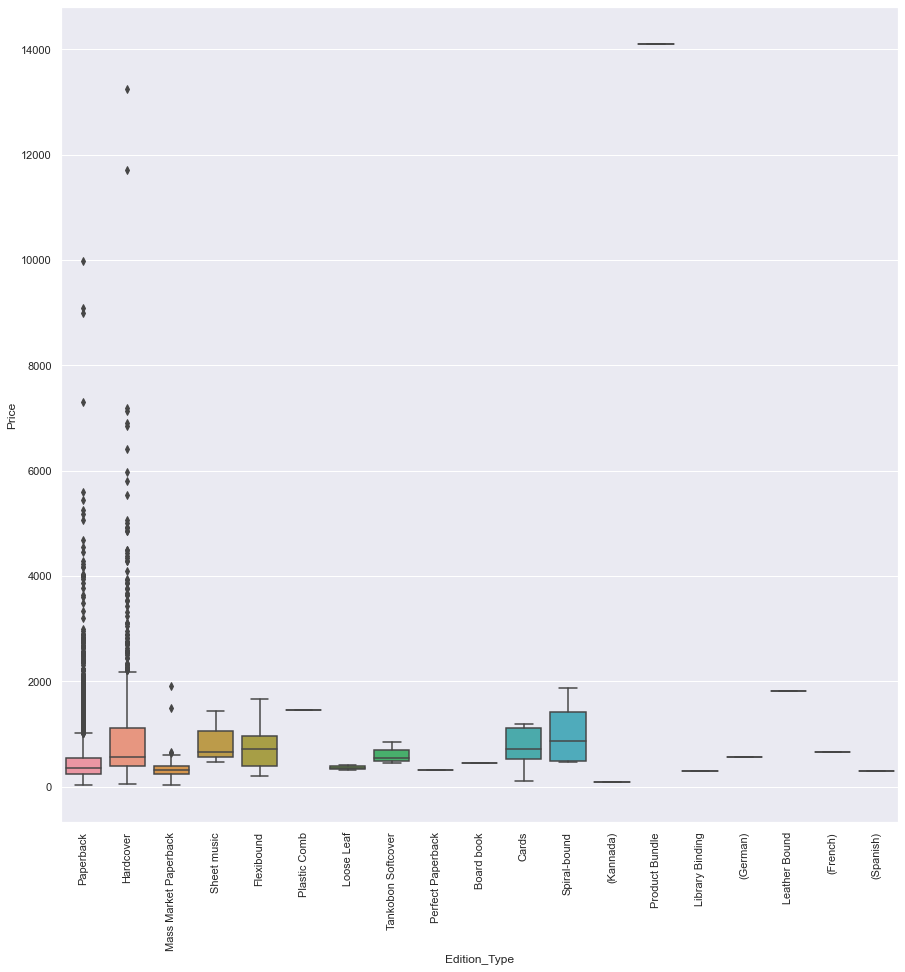

In [419]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x=df.loc[:6236, :].Edition_Type,y=target , ax=ax)
plt.xticks(rotation=90)
plt.show()

In [420]:
df.head(n=15)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,Paperback,2009
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",Paperback,2017
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,Hardcover,2018
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",Paperback,2015
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,Paperback,2013


In [421]:
from unicodedata import digit


edition_no = []

for i in df['Edition']:
    str = i.split(',')[1]
    
    if str[2].isnumeric():
        #print(str[2])
        edition_no.append(int(str[2]))
    else:
        edition_no.append(1)

In [422]:
len(edition_no)

7797

In [423]:
df['Edition_No'] = edition_no

In [424]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016,1
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982,2
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1


In [425]:
review = []

for i in df['Reviews']:
    str = i.split(' ')[0]
    review.append(float(str))    

In [426]:
list(set(review))

[1.0,
 2.0,
 3.9,
 4.0,
 5.0,
 4.8,
 4.1,
 4.5,
 4.4,
 4.7,
 4.2,
 4.9,
 4.3,
 2.5,
 1.5,
 3.5,
 3.0,
 4.6,
 1.6,
 2.6,
 2.1,
 3.1,
 3.6,
 1.7,
 2.8,
 2.7,
 2.3,
 2.2,
 3.8,
 3.7,
 3.2,
 3.3,
 1.4,
 2.9,
 2.4,
 3.4]

In [427]:
df['Review_Number'] = review

In [428]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016,1,4.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7,3.9
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982,2,4.8
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5,4.1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1,5.0


In [429]:
df['Review_Number'].value_counts()

5.0    1751
4.0     713
4.5     626
4.6     491
4.4     488
4.3     450
4.7     412
4.2     406
4.1     381
3.9     300
4.8     272
3.8     239
3.7     203
3.0     176
3.6     145
3.5     143
4.9      99
3.4      92
3.3      74
1.0      65
3.1      57
3.2      50
2.0      44
2.9      36
2.5      23
2.7      18
2.8      12
2.3       7
1.5       6
2.4       5
2.6       5
2.2       3
1.4       2
1.7       1
1.6       1
2.1       1
Name: Review_Number, dtype: int64

In [430]:
rating = []

for value in df['Ratings']:
    rev = re.findall(r'\d+',value)
    out = [int(match.replace(',', '')) for match in re.findall('[\d,]+', value)]
    #print(out)
    rating.append(out[0])

In [431]:
df['No_Of_Ratings'] = rating

In [432]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016,1,4.0,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7,3.9,14
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982,2,4.8,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5,4.1,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1,5.0,1


### Genre

In [433]:
df['Genre'].value_counts()

Action & Adventure (Books)               1183
Romance (Books)                           517
Biographies & Autobiographies (Books)     463
Crime, Thriller & Mystery (Books)         335
Contemporary Fiction (Books)              325
                                         ... 
Bodybuilding & Weightlifting (Books)        1
Immunology                                  1
Target Shooting (Books)                     1
Ecotourism                                  1
Military History (Books)                    1
Name: Genre, Length: 363, dtype: int64

In [434]:
genre_dict= {}
for i,j in df['Genre'].value_counts().items():
        #print(i,j)
        #print(j)
        
        if j>=10:
            genre_dict[i] = i
        else:
            genre_dict[i] = 'other'

In [435]:
genre_dict

{'Action & Adventure (Books)': 'Action & Adventure (Books)',
 'Romance (Books)': 'Romance (Books)',
 'Biographies & Autobiographies (Books)': 'Biographies & Autobiographies (Books)',
 'Crime, Thriller & Mystery (Books)': 'Crime, Thriller & Mystery (Books)',
 'Contemporary Fiction (Books)': 'Contemporary Fiction (Books)',
 'Comics & Mangas (Books)': 'Comics & Mangas (Books)',
 'Mangas': 'Mangas',
 'Music Books': 'Music Books',
 'Design': 'Design',
 'Humour (Books)': 'Humour (Books)',
 'Dictionaries': 'Dictionaries',
 'Indian Writing (Books)': 'Indian Writing (Books)',
 'Cinema & Broadcast (Books)': 'Cinema & Broadcast (Books)',
 'Handicrafts, Decorative Arts & Crafts (Books)': 'Handicrafts, Decorative Arts & Crafts (Books)',
 'Arts History, Theory & Criticism (Books)': 'Arts History, Theory & Criticism (Books)',
 'Computer Science Books': 'Computer Science Books',
 'True Accounts (Books)': 'True Accounts (Books)',
 'Healthy Living & Wellness (Books)': 'Healthy Living & Wellness (Books)'

In [436]:
df['New_Genre'] = df['Genre'].map(genre_dict)

In [437]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings,New_Genre
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016,1,4.0,8,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7,3.9,14,Cinema & Broadcast (Books)
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982,2,4.8,6,International Relations
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5,4.1,13,Contemporary Fiction (Books)
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1,5.0,1,Photography Textbooks


### BookCategory

In [438]:
df['BookCategory'].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

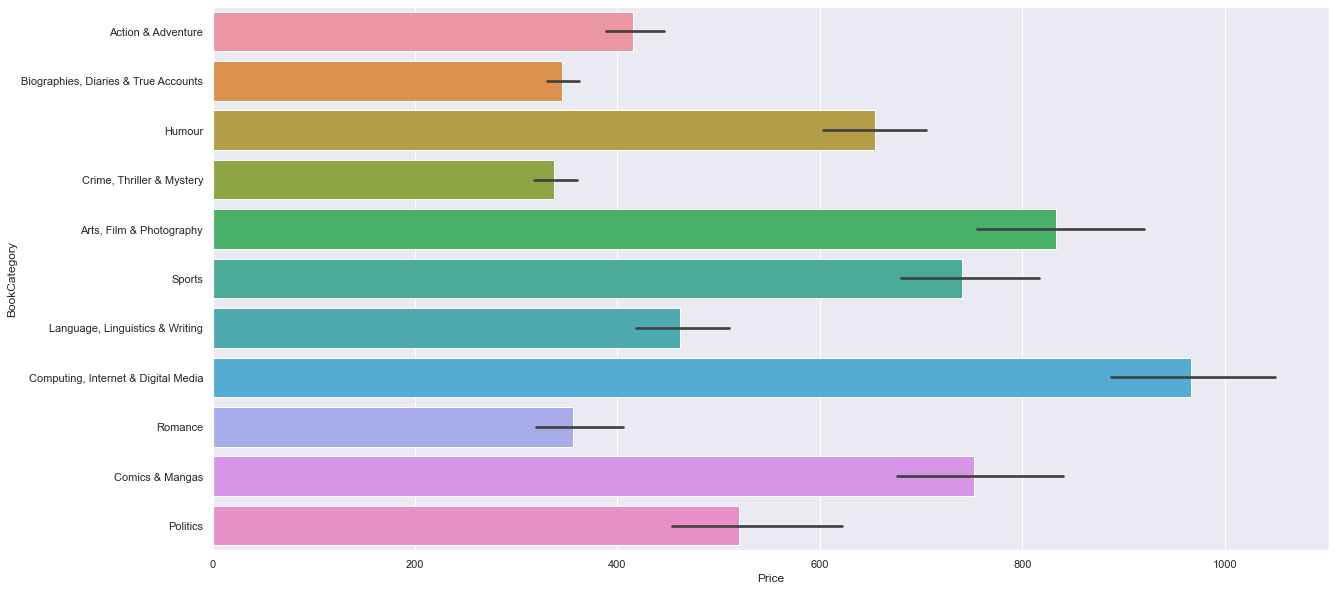

In [439]:
plt.figure(figsize=(20,10))
sns.barplot(y=df.loc[:6236, :].BookCategory,x=target)
plt.show()

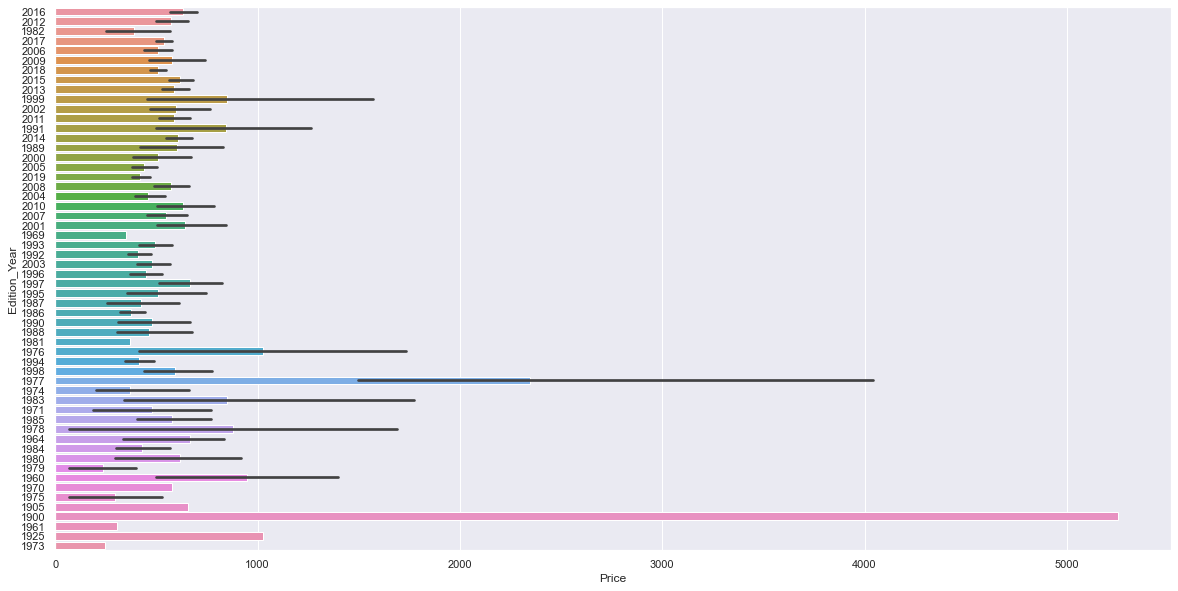

In [440]:
plt.figure(figsize=(20,10))
sns.barplot(y=df.loc[:6236, :].Edition_Year,x=target)
plt.show()

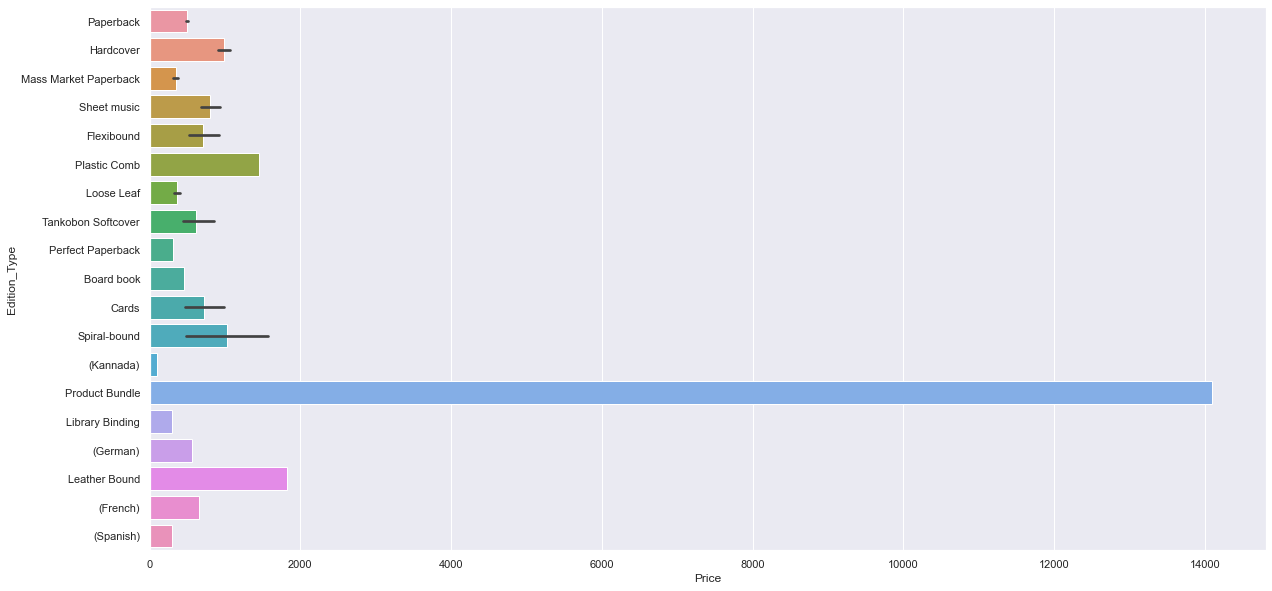

In [441]:
plt.figure(figsize=(20,10))
sns.barplot(y=df.loc[:6236, :].Edition_Type,x=target)
plt.show()

In [442]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings,New_Genre
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,Paperback,2016,1,4.0,8,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7,3.9,14,Cinema & Broadcast (Books)
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,Paperback,1982,2,4.8,6,International Relations
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5,4.1,13,Contemporary Fiction (Books)
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1,5.0,1,Photography Textbooks


In [443]:
# Dropping columns

cols = ['Title','Edition','Reviews','Ratings','Synopsis','New_Genre']

df = df.drop(columns=cols,axis=1)

In [444]:
df.head()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
0,Chris Kuzneski,Action & Adventure (Books),Action & Adventure,Paperback,2016,1,4.0,8
1,Arun Khopkar,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",Paperback,2012,7,3.9,14
2,Thomas Hobbes,International Relations,Humour,Paperback,1982,2,4.8,6
3,Agatha Christie,Contemporary Fiction (Books),"Crime, Thriller & Mystery",Paperback,2017,5,4.1,13
4,Editors of Life,Photography Textbooks,"Arts, Film & Photography",Hardcover,2006,1,5.0,1


In [445]:
# Label Encoder

le = LabelEncoder()

df['Author'] = le.fit_transform(df['Author'])
df['Genre'] = le.fit_transform(df['Genre'])
df['BookCategory'] = le.fit_transform(df['BookCategory'])
df['Edition_Type'] = le.fit_transform(df['Edition_Type'])


In [446]:
df.head()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
0,748,1,0,13,2016,1,4.0,8
1,370,78,2,13,2012,7,3.9,14
2,4045,202,6,13,1982,2,4.8,6
3,79,96,5,13,2017,5,4.1,13
4,1138,264,1,8,2006,1,5.0,1


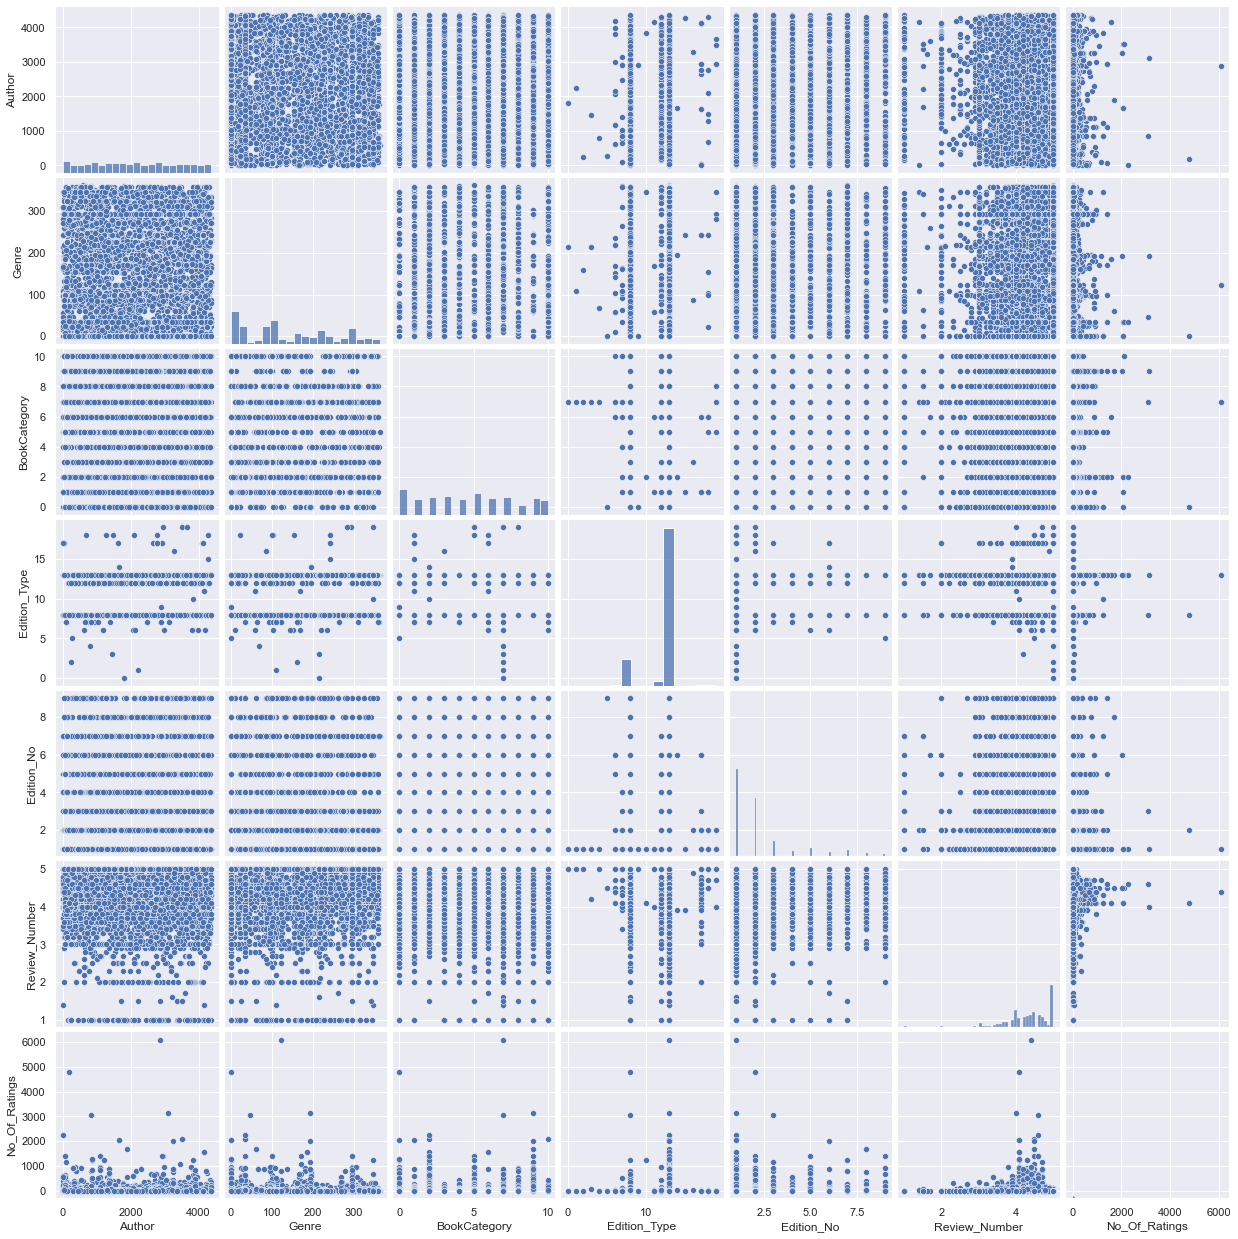

In [447]:
sns.pairplot(df)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Author         7797 non-null   int32  
 1   Genre          7797 non-null   int32  
 2   BookCategory   7797 non-null   int32  
 3   Edition_Type   7797 non-null   int32  
 4   Edition_Year   7797 non-null   object 
 5   Edition_No     7797 non-null   int64  
 6   Review_Number  7797 non-null   float64
 7   No_Of_Ratings  7797 non-null   int64  
dtypes: float64(1), int32(4), int64(2), object(1)
memory usage: 365.6+ KB


In [449]:
df['Edition_Year'] = df['Edition_Year'].astype(int)

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Author         7797 non-null   int32  
 1   Genre          7797 non-null   int32  
 2   BookCategory   7797 non-null   int32  
 3   Edition_Type   7797 non-null   int32  
 4   Edition_Year   7797 non-null   int32  
 5   Edition_No     7797 non-null   int64  
 6   Review_Number  7797 non-null   float64
 7   No_Of_Ratings  7797 non-null   int64  
dtypes: float64(1), int32(5), int64(2)
memory usage: 335.2 KB


In [451]:
df.describe()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
count,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000
mean,2148.142875,142.654867,4.635244,12.288060,2011.836091,2.257407,4.295845,35.520841
std,1257.563270,109.199704,3.185005,1.800498,7.876097,1.839032,0.663513,153.020897
min,0.000000,0.000000,0.000000,0.000000,1900.000000,1.000000,1.000000,1.000000
25%,1079.000000,35.000000,2.000000,13.000000,2010.000000,1.000000,4.000000,2.000000
50%,2136.000000,109.000000,5.000000,13.000000,2014.000000,2.000000,4.400000,6.000000
75%,3226.000000,227.000000,7.000000,13.000000,2017.000000,2.000000,4.800000,21.000000
max,4371.000000,362.000000,10.000000,19.000000,2019.000000,9.000000,5.000000,6090.000000


In [452]:
df.shape

(7797, 8)

In [453]:
y = target
train_final = df.loc[:6236, :].copy()
test_final = df.loc[6236 + 1:, :].reset_index(drop=True).copy()

In [454]:
train_final.head()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
0,748,1,0,13,2016,1,4.0,8
1,370,78,2,13,2012,7,3.9,14
2,4045,202,6,13,1982,2,4.8,6
3,79,96,5,13,2017,5,4.1,13
4,1138,264,1,8,2006,1,5.0,1


In [455]:
test_final.head()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings
0,3769,304,5,12,1986,1,4.4,960
1,1303,255,4,13,2018,1,5.0,1
2,887,294,9,13,2011,1,5.0,4
3,166,275,4,13,2016,2,4.1,11
4,3261,219,7,13,2011,2,4.4,9


In [456]:
train_final['Price'] = target

In [457]:
train_final.head()

,Author,Genre,BookCategory,Edition_Type,Edition_Year,Edition_No,Review_Number,No_Of_Ratings,Price
0,748,1,0,13,2016,1,4.0,8,220.00
1,370,78,2,13,2012,7,3.9,14,202.93
2,4045,202,6,13,1982,2,4.8,6,299.00
3,79,96,5,13,2017,5,4.1,13,180.00
4,1138,264,1,8,2006,1,5.0,1,965.62


Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

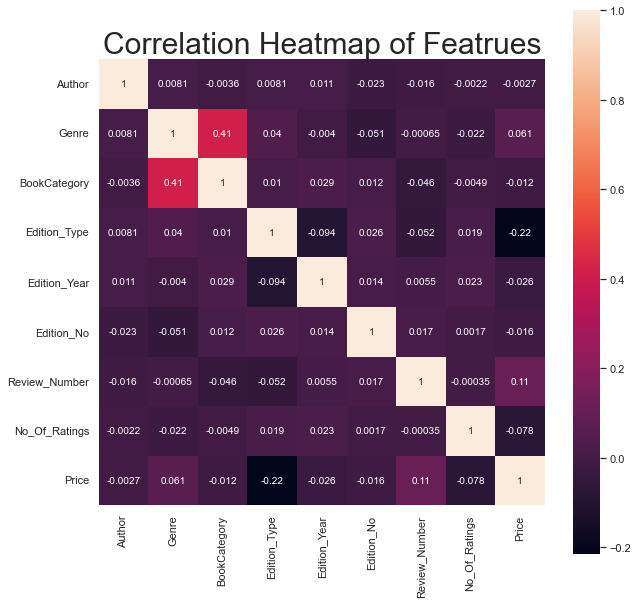

In [458]:
plt.figure(figsize=(10,10))
sns.heatmap(train_final.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=30)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review_Number', ylabel='Price'>

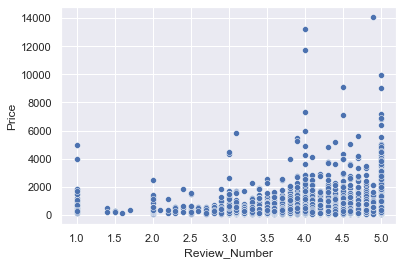

In [459]:
sns.scatterplot(train_final.Review_Number,train_final.Price)

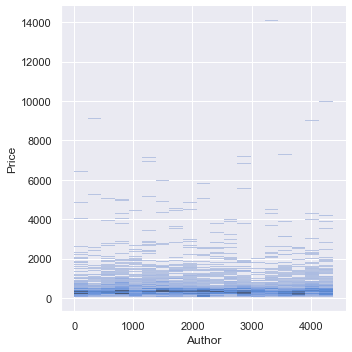

In [460]:
sns.displot(data=train_final,x='Author',y='Price')

In [461]:
# Train Test Split
X = train_final.drop('Price',axis=1)
y = train_final[['Price']]

In [462]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

# Random Forest

In [463]:
rf = RandomForestRegressor(random_state=0 , n_estimators=50)

In [464]:
rf.fit(X_train,y_train)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17772/1593328843.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=0)

In [465]:
y_pred = rf.predict(X_test)

In [466]:
def accuracy_metix(y_test,y_pred,model,X,y):
    print('MSE :',mean_squared_error(y_test,y_pred))
    print('RMSE :',(np.sqrt(mean_squared_error( y_test,y_pred))))
    print('RMSLE :',(np.sqrt(mean_squared_log_error( abs(y_test),abs(y_pred)))))
    print('R2_Score : ',r2_score(y_test,y_pred))
    adjusted_R2_Score = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("Adjusted R2 Score : ",adjusted_R2_Score)
    

In [467]:
accuracy_metix(y_test,y_pred,rf,X_train,y_train)

MSE : 329627.28018344415
RMSE : 574.1317620402516
RMSLE : 0.6871860867998896
R2_Score :  0.12374468560593199
Adjusted R2 Score :  0.8804307237811768


## XGBOOST

In [468]:

xgb = xgb.XGBRegressor(max_depth=16,random_state=32,n_estimator=150)

In [469]:
xgb.fit(X_train,y_train)

[02:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=16, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=150,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=32, reg_alpha=0, ...)

In [470]:
y_pred = xgb.predict(X_test)

In [471]:
accuracy_metix(y_test,y_pred,xgb,X_train,y_train)

MSE : 443271.30109688616
RMSE : 665.7862277765184
RMSLE : 0.6978527380992309
R2_Score :  -0.1783576683591137
Adjusted R2 Score :  0.9984890116278852


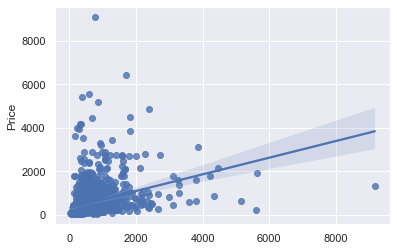

In [472]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x=y_pred,y=y_test)

In [473]:
#plotting regression lines

def plot_regression_line(X_train,y_train,X_test,y_pred):
    plt.title("Plotting the regresion lines")
    plt.scatter(X_train, y_train,color='g') 
    plt.plot(X_test, y_pred,color='k') 
    plt.show()
    

In [474]:
# RFE
from sklearn.feature_selection import RFE
rfe = RFE(xgb,3)
rfe.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[02:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This c

RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                           colsample_bylevel=1, colsample_bynode=1,
                           colsample_bytree=1, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None, gamma=0,
                           gpu_id=-1, grow_policy='depthwise',
                           importance_type=None, interaction_constraints='',
                           learning_rate=0.300000012, max_bin=256,
                           max_cat_to_onehot=4, max_delta_step=0, max_depth=16,
                           max_leaves=0, min_child_weight=1, missing=nan,
                           monotone_constraints='()', n_estimator=150,
                           n_estimators=100, n_jobs=0, num_parallel_tree=1,
                           predictor='auto', random_state=32, reg_alpha=0, ...),
    n_features_to_select=3)

In [475]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False])

In [476]:
print(X_train.columns[rfe.support_])

Index(['BookCategory', 'Edition_Type', 'Edition_Year'], dtype='object')


In [477]:
new_cols = X_train.columns[rfe.support_]

xgb.fit(X_train[new_cols],y_train)
y_pred = xgb.predict(X_test[new_cols])

[02:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [478]:
accuracy_metix(y_test,y_pred,xgb,X_train[new_cols],y_train)

MSE : 419223.88304470683
RMSE : 647.4750057297246
RMSLE : 0.7439970188939763
R2_Score :  -0.11443189785264596
Adjusted R2 Score :  0.46200665841950983


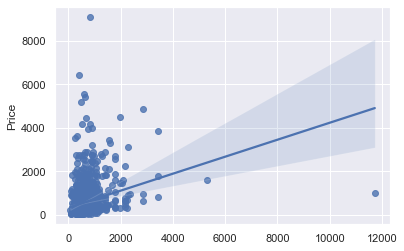

In [479]:
sns.set_theme(color_codes=True)
ax = sns.regplot(x=y_pred,y=y_test)

In [480]:
import statsmodels.formula.api as sm

# SVR

In [481]:
from sklearn.svm import SVR
model_svr = SVR(C=1.0,epsilon=0.2)
model_svr.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(epsilon=0.2)

In [482]:
y_predict_svr = model_svr.predict(X_test)

In [483]:
accuracy_metix(y_test,y_predict_svr,model_svr,X_train,y_train)

MSE : 408546.8289586019
RMSE : 639.1766805497538
RMSLE : 0.754989567438223
R2_Score :  -0.08604885449587152
Adjusted R2 Score :  -0.07273204138714817


# LightGBM

In [484]:
import lightgbm as lgb
model_lgbm = lgb.LGBMRegressor(n_estimators=600,random_state=0)
model_lgbm.fit(X_train,y_train)


LGBMRegressor(n_estimators=600, random_state=0)

In [485]:
y_pred_lgbm = model_lgbm.predict(X_test)

In [486]:
accuracy_metix(y_test,y_pred_lgbm,model_lgbm,X_train,y_train)

MSE : 353325.07338408264
RMSE : 594.4115353726597
RMSLE : 0.8410749308732012
R2_Score :  0.06074833038947425
Adjusted R2 Score :  0.9053731493689628


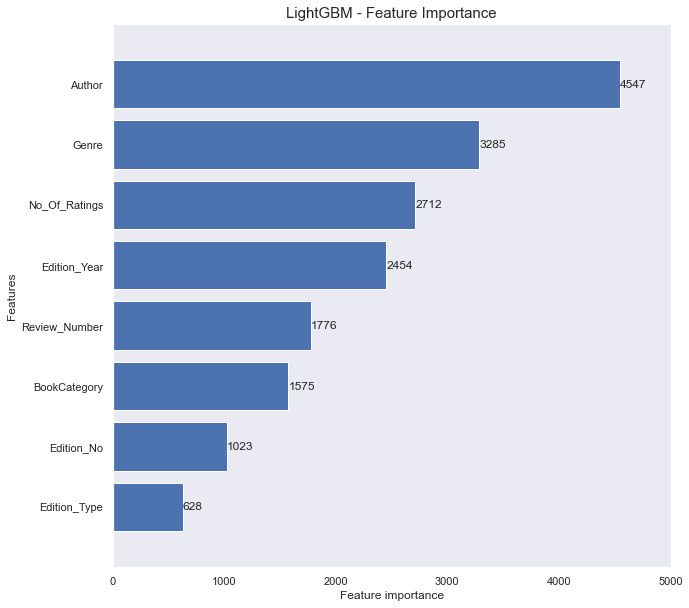

In [487]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(model_lgbm, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [488]:
final = model_lgbm.predict(test_final)


In [489]:
result = pd.DataFrame(abs(final),columns={'Price'})

In [490]:
result.head()

,Price
0,364.566619
1,1902.606654
2,398.934540
3,1157.052339
4,272.924558


In [493]:
result = result.astype({"Price":'str'})

In [494]:
result.to_csv("F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Submission\LGBMv3.csv",index=False)

In [495]:
result.dtypes

Price    object
dtype: object